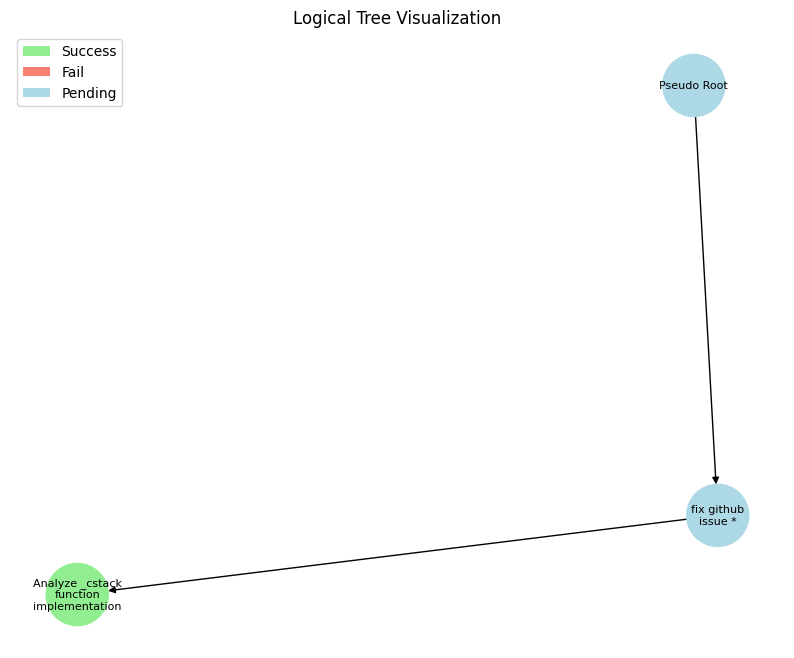

In [16]:
import matplotlib.pyplot as plt
from src.services.logical_tree import LogicalTree

# Example usage:
tree = LogicalTree.load("/data/yuanwen/workspace/tmp/0/logical_tree.json")  # load saved JSON into the object
fig = tree.visualize()
plt.show()

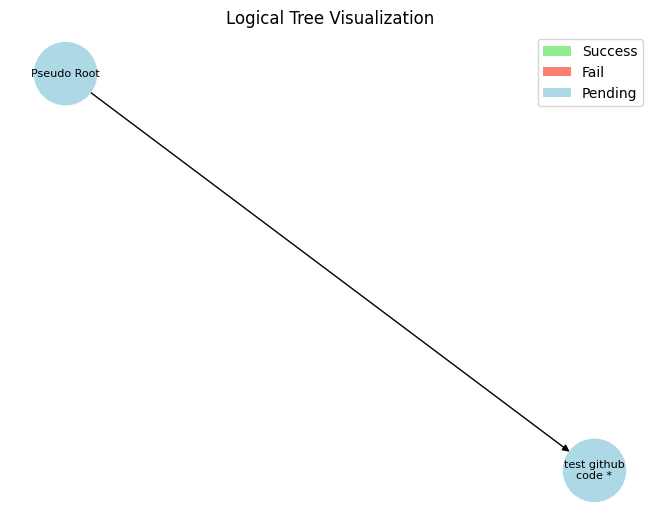

In [1]:
import json
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import textwrap

def visualize_logical_tree(json_path: str, max_name_length: int = 15):
    """
    Visualize a logical tree stored in a JSON file, highlighting the current node
    by adding '*' next to its label and indicating the success/failure status of each node.
    Automatically wraps long names for better display.

    Args:
        json_path (str): Path to the logical_tree.json file (must include "_current_node").
        max_name_length (int): Maximum characters per line for node names.
    """
    # Load tree
    with open(json_path, "r") as f:
        tree = json.load(f)

    current_node_name = tree.get("_current_node", "")

    G = nx.DiGraph()
    node_status = {}  # 保存每个节点的状态
    node_labels = {}  # 保存处理后的节点标签

    # Recursive function to add nodes and edges
    def add_edges(node, parent_name=None):
        G.add_node(node["name"])
        node_status[node["name"]] = node.get("status", "pending")  # 默认 pending
        # 自动换行处理name
        wrapped_name = "\n".join(textwrap.wrap(node["name"], max_name_length))
        # 如果是当前节点，在标签后面加 *
        if node["name"] == current_node_name:
            wrapped_name += " *"
        node_labels[node["name"]] = wrapped_name
        if parent_name:
            G.add_edge(parent_name, node["name"])
        for child in node.get("children", []):
            add_edges(child, node["name"])

    add_edges(tree)

    # Node colors based on status
    color_map = {
        "success": "lightgreen",
        "fail": "salmon",
        "pending": "lightblue"
    }
    node_colors = [color_map.get(node_status.get(n, "pending"), "lightblue") for n in G.nodes()]

    # Draw tree
    pos = nx.spring_layout(G, seed=42, k=2)  # k 调整节点间距
    nx.draw(G, pos, with_labels=False, node_color=node_colors, node_size=2000, arrows=True)

    # 绘制标签，自动换行
    for n, (x, y) in pos.items():
        plt.text(x, y, node_labels[n], fontsize=8, ha="center", va="center")

    # 图例
    legend_elements = [
        Patch(facecolor="lightgreen", label="Success"),
        Patch(facecolor="salmon", label="Fail"),
        Patch(facecolor="lightblue", label="Pending"),
    ]
    plt.legend(handles=legend_elements, loc="best")
    plt.title("Logical Tree Visualization")
    plt.show()


# Example usage
visualize_logical_tree("logical_tree1.json")